In [1]:
%matplotlib inline
import tensorflow as tf
tf.get_logger().setLevel('INFO')

# GPU?
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
import os

import numpy as np
import pathlib

import tensorflow as tf
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('INFO')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [18]:
targ_dir = pathlib.Path("100_foods_cleaned_manually_10_classes")
train_data_path = pathlib.Path(targ_dir).joinpath("train")
test_data_path = pathlib.Path(targ_dir).joinpath("test")

import os
class_names = sorted(os.listdir(train_data_path))
class_names, len(class_names)

(['Apple',
  'Artichoke',
  'Avocado',
  'BBQ sauce',
  'Bacon',
  'Bagel',
  'Banana',
  'Beef',
  'Beer',
  'Blueberries',
  'Bread',
  'Broccoli',
  'Butter',
  'Cabbage',
  'Candy',
  'Cantaloupe',
  'Carrot',
  'Cheese',
  'Cherry',
  'Chicken wings',
  'Cocktail',
  'Coconut',
  'Coffee',
  'Cookie',
  'Corn chips',
  'Cream',
  'Cucumber',
  'Doughnut',
  'Dumpling',
  'Egg',
  'Egg tart',
  'Eggplant',
  'Fish',
  'French fries',
  'Fries',
  'Garlic',
  'Grape',
  'Grapefruit',
  'Green beans',
  'Green onion',
  'Guacamole',
  'Hamburger',
  'Hamimelon',
  'Honey',
  'Ice cream',
  'Kiwi fruit',
  'Lemon',
  'Lettuce',
  'Lime',
  'Lobster',
  'Mango',
  'Meat ball',
  'Milk',
  'Muffin',
  'Mushroom',
  'Noodles',
  'Nuts',
  'Okra',
  'Olive oil',
  'Olives',
  'Onion',
  'Orange',
  'Orange juice',
  'Pancake',
  'Papaya',
  'Pasta',
  'Pastry',
  'Peach',
  'Pear',
  'Pepper',
  'Pie',
  'Pineapple',
  'Pizza',
  'Plum',
  'Pomegranate',
  'Popcorn',
  'Potato',
  'Prawns

In [19]:
# Create data loader
train_data = DataLoader.from_folder(train_data_path)
test_data = DataLoader.from_folder(test_data_path)

train_data, test_data

INFO:tensorflow:Load image with size: 9473, num_label: 100, labels: Apple, Artichoke, Avocado, BBQ sauce, Bacon, Bagel, Banana, Beef, Beer, Blueberries, Bread, Broccoli, Butter, Cabbage, Candy, Cantaloupe, Carrot, Cheese, Cherry, Chicken wings, Cocktail, Coconut, Coffee, Cookie, Corn chips, Cream, Cucumber, Doughnut, Dumpling, Egg, Egg tart, Eggplant, Fish, French fries, Fries, Garlic, Grape, Grapefruit, Green beans, Green onion, Guacamole, Hamburger, Hamimelon, Honey, Ice cream, Kiwi fruit, Lemon, Lettuce, Lime, Lobster, Mango, Meat ball, Milk, Muffin, Mushroom, Noodles, Nuts, Okra, Olive oil, Olives, Onion, Orange, Orange juice, Pancake, Papaya, Pasta, Pastry, Peach, Pear, Pepper, Pie, Pineapple, Pizza, Plum, Pomegranate, Popcorn, Potato, Prawns, Pretzel, Pumpkin, Radish, Red cabbage, Rice, Salad, Salt, Sandwich, Sausages, Soft drink, Spinach, Spring rolls, Steak, Strawberries, Sushi, Tea, Tomato, Tomato sauce, Waffle, Watermelon, Wine, Zucchini.


INFO:tensorflow:Load image with size: 9473, num_label: 100, labels: Apple, Artichoke, Avocado, BBQ sauce, Bacon, Bagel, Banana, Beef, Beer, Blueberries, Bread, Broccoli, Butter, Cabbage, Candy, Cantaloupe, Carrot, Cheese, Cherry, Chicken wings, Cocktail, Coconut, Coffee, Cookie, Corn chips, Cream, Cucumber, Doughnut, Dumpling, Egg, Egg tart, Eggplant, Fish, French fries, Fries, Garlic, Grape, Grapefruit, Green beans, Green onion, Guacamole, Hamburger, Hamimelon, Honey, Ice cream, Kiwi fruit, Lemon, Lettuce, Lime, Lobster, Mango, Meat ball, Milk, Muffin, Mushroom, Noodles, Nuts, Okra, Olive oil, Olives, Onion, Orange, Orange juice, Pancake, Papaya, Pasta, Pastry, Peach, Pear, Pepper, Pie, Pineapple, Pizza, Plum, Pomegranate, Popcorn, Potato, Prawns, Pretzel, Pumpkin, Radish, Red cabbage, Rice, Salad, Salt, Sandwich, Sausages, Soft drink, Spinach, Spring rolls, Steak, Strawberries, Sushi, Tea, Tomato, Tomato sauce, Waffle, Watermelon, Wine, Zucchini.


INFO:tensorflow:Load image with size: 2368, num_label: 100, labels: Apple, Artichoke, Avocado, BBQ sauce, Bacon, Bagel, Banana, Beef, Beer, Blueberries, Bread, Broccoli, Butter, Cabbage, Candy, Cantaloupe, Carrot, Cheese, Cherry, Chicken wings, Cocktail, Coconut, Coffee, Cookie, Corn chips, Cream, Cucumber, Doughnut, Dumpling, Egg, Egg tart, Eggplant, Fish, French fries, Fries, Garlic, Grape, Grapefruit, Green beans, Green onion, Guacamole, Hamburger, Hamimelon, Honey, Ice cream, Kiwi fruit, Lemon, Lettuce, Lime, Lobster, Mango, Meat ball, Milk, Muffin, Mushroom, Noodles, Nuts, Okra, Olive oil, Olives, Onion, Orange, Orange juice, Pancake, Papaya, Pasta, Pastry, Peach, Pear, Pepper, Pie, Pineapple, Pizza, Plum, Pomegranate, Popcorn, Potato, Prawns, Pretzel, Pumpkin, Radish, Red cabbage, Rice, Salad, Salt, Sandwich, Sausages, Soft drink, Spinach, Spring rolls, Steak, Strawberries, Sushi, Tea, Tomato, Tomato sauce, Waffle, Watermelon, Wine, Zucchini.


INFO:tensorflow:Load image with size: 2368, num_label: 100, labels: Apple, Artichoke, Avocado, BBQ sauce, Bacon, Bagel, Banana, Beef, Beer, Blueberries, Bread, Broccoli, Butter, Cabbage, Candy, Cantaloupe, Carrot, Cheese, Cherry, Chicken wings, Cocktail, Coconut, Coffee, Cookie, Corn chips, Cream, Cucumber, Doughnut, Dumpling, Egg, Egg tart, Eggplant, Fish, French fries, Fries, Garlic, Grape, Grapefruit, Green beans, Green onion, Guacamole, Hamburger, Hamimelon, Honey, Ice cream, Kiwi fruit, Lemon, Lettuce, Lime, Lobster, Mango, Meat ball, Milk, Muffin, Mushroom, Noodles, Nuts, Okra, Olive oil, Olives, Onion, Orange, Orange juice, Pancake, Papaya, Pasta, Pastry, Peach, Pear, Pepper, Pie, Pineapple, Pizza, Plum, Pomegranate, Popcorn, Potato, Prawns, Pretzel, Pumpkin, Radish, Red cabbage, Rice, Salad, Salt, Sandwich, Sausages, Soft drink, Spinach, Spring rolls, Steak, Strawberries, Sushi, Tea, Tomato, Tomato sauce, Waffle, Watermelon, Wine, Zucchini.


(<tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader at 0x7fb9327e88e0>,
 <tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader at 0x7fb89014cbe0>)

In [20]:
# Create model
model = image_classifier.create(train_data, 
                                validation_data=test_data,
                                model_spec="efficientnet_lite1",
                                use_augmentation=True,
                                epochs=15)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_2 (Hub  (None, 1280)             4189344   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               128100    
                                                                 
Total params: 4,317,444
Trainable params: 128,100
Non-trainable params: 4,189,344
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/15
296/296 [==============================] - 184s 610ms/step - loss: 3.6075 - accuracy: 0.3216 - val_loss: 2.6454 - val_accuracy: 0.5773
Epoch 2/15
296/296 [==============================] - 190s 640ms/step - loss: 2.4526 - accuracy: 0.5866 - val_loss: 2.1117 - val_accuracy: 0.6681
Epoch 3/15
296/296 [==============================] - 208s 704ms/step - loss: 2.1324 - accuracy: 0.6440 - val_loss: 1.9286 - val_accuracy: 0.7023
Epoch 4/15
296/296 [==============================] - 212s 716ms/step - loss: 1.9921 - accuracy: 0.6776 - val_loss: 1.8348 - val_accuracy: 0.7196
Epoch 5/15
296/296 [==============================] - 211s 712ms/step - loss: 1.9151 - accuracy: 0.6958 - val_loss: 1.7827 - val_accuracy: 0.7373
Epoch 6/15
296/296 [==============================] - 215s 726ms/step - loss: 1.8462 - accuracy: 0.7133 - val_loss: 1.7418 - val_accuracy: 0.7492
Epoch 7/15
296/296 [==============================] - 208s 703ms/step - loss: 1.8228 - accuracy: 0.7186 - val_loss: 1.7185 -

In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
test_loss, test_accuracy

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


74/74 [==============================] - 49s 658ms/step - loss: 1.6330 - accuracy: 0.7749


(1.6329556703567505, 0.7749155163764954)

In [22]:
# Save the model
if not os.path.exists("models"):
    os.makedirs("models")
model.export(export_dir='.', tflite_filename="models/2022-01-16-nutrify_model_foods_v1.tflite")

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /var/folders/ms/842f9jln7dz5b1xzjpjv_n2w0000gn/T/tmp7pfmnk9g/assets


INFO:tensorflow:Assets written to: /var/folders/ms/842f9jln7dz5b1xzjpjv_n2w0000gn/T/tmp7pfmnk9g/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /var/folders/ms/842f9jln7dz5b1xzjpjv_n2w0000gn/T/tmp_xm56ogf/labels.txt


INFO:tensorflow:Saving labels in /var/folders/ms/842f9jln7dz5b1xzjpjv_n2w0000gn/T/tmp_xm56ogf/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./models/2022-01-16-nutrify_model_foods_v1.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./models/2022-01-16-nutrify_model_foods_v1.tflite


In [23]:
# Load image
import pprint
def pred_and_plot(image_path, img_shape=224, number_of_top_preds=5):
    # Read in the image
    img = tf.io.read_file(str(image_path))
    # Decode it into a tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])
    # Scale pixels
    img = img/255.
    preds = model.predict_top_k(tf.expand_dims(img, axis=0), k=number_of_top_preds, batch_size=1)
    pprint.pprint(preds[0])
    
    plt.figure()
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Pred class: {preds[0][0][0]} | Prob: {float(preds[0][0][1]):.3f}")

[('Chicken wings', 0.37347758),
 ('Meat ball', 0.28565735),
 ('Prawns', 0.08944983),
 ('Steak', 0.06427159),
 ('Dumpling', 0.027919667)]


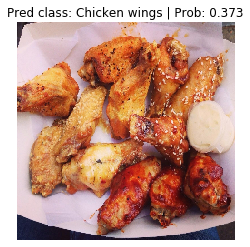

In [24]:
# Get image chicken wings
# !wget https://raw.githubusercontent.com/mrdbourke/nutrify/main/images/sample-food-images/chicken_wings.jpeg
# !mv chicken_wings.jpeg images/chicken_wings.jpeg
pred_and_plot("images/chicken_wings.jpeg", img_shape=240)

[('Bacon', 0.16570814),
 ('Pancake', 0.15231676),
 ('Cheese', 0.1097481),
 ('Sausages', 0.095981605),
 ('Sandwich', 0.062333573)]


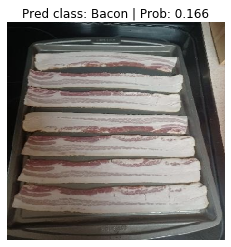

In [25]:
pred_and_plot("images/bacon.jpeg", img_shape=240)

In [26]:
len(class_names)

100

In [27]:
class_dict = {}
for i, class_name in enumerate(class_names):
    class_dict[i] = class_name
class_dict

{0: 'Apple',
 1: 'Artichoke',
 2: 'Avocado',
 3: 'BBQ sauce',
 4: 'Bacon',
 5: 'Bagel',
 6: 'Banana',
 7: 'Beef',
 8: 'Beer',
 9: 'Blueberries',
 10: 'Bread',
 11: 'Broccoli',
 12: 'Butter',
 13: 'Cabbage',
 14: 'Candy',
 15: 'Cantaloupe',
 16: 'Carrot',
 17: 'Cheese',
 18: 'Cherry',
 19: 'Chicken wings',
 20: 'Cocktail',
 21: 'Coconut',
 22: 'Coffee',
 23: 'Cookie',
 24: 'Corn chips',
 25: 'Cream',
 26: 'Cucumber',
 27: 'Doughnut',
 28: 'Dumpling',
 29: 'Egg',
 30: 'Egg tart',
 31: 'Eggplant',
 32: 'Fish',
 33: 'French fries',
 34: 'Fries',
 35: 'Garlic',
 36: 'Grape',
 37: 'Grapefruit',
 38: 'Green beans',
 39: 'Green onion',
 40: 'Guacamole',
 41: 'Hamburger',
 42: 'Hamimelon',
 43: 'Honey',
 44: 'Ice cream',
 45: 'Kiwi fruit',
 46: 'Lemon',
 47: 'Lettuce',
 48: 'Lime',
 49: 'Lobster',
 50: 'Mango',
 51: 'Meat ball',
 52: 'Milk',
 53: 'Muffin',
 54: 'Mushroom',
 55: 'Noodles',
 56: 'Nuts',
 57: 'Okra',
 58: 'Olive oil',
 59: 'Olives',
 60: 'Onion',
 61: 'Orange',
 62: 'Orange juice'

## Evaluation

In [28]:
random_test_image_path[0]

NameError: name 'random_test_image_path' is not defined

Image path: 100_foods_cleaned_manually_10_classes/test/Wine/50c87556-ec82-44ea-a82b-8918245c262c.jpg
[('Wine', 0.85158974),
 ('Beer', 0.030780165),
 ('Olive oil', 0.01288484),
 ('Soft drink', 0.011076783),
 ('BBQ sauce', 0.010215704)]
Image path: 100_foods_cleaned_manually_10_classes/test/Eggplant/b1b7760a-3909-438e-8ba2-23a6a2e50eb8.jpg
[('Eggplant', 0.33116886),
 ('Plum', 0.14556222),
 ('Avocado', 0.12124298),
 ('Radish', 0.029192433),
 ('Watermelon', 0.029058948)]
Image path: 100_foods_cleaned_manually_10_classes/test/Nuts/7da58117-0f0e-470f-90d2-9e2001af94cc.jpg
[('Nuts', 0.74941885),
 ('Potato', 0.06570729),
 ('Avocado', 0.030675117),
 ('Bagel', 0.022427103),
 ('Banana', 0.014635465)]


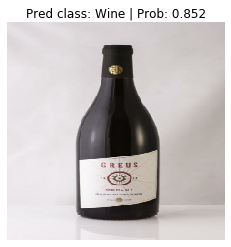

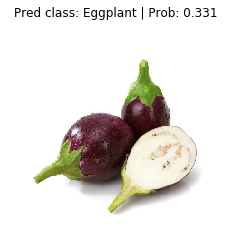

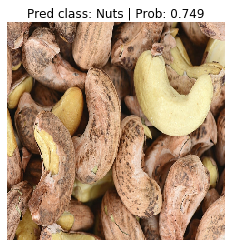

In [33]:
import random
test_image_paths = list(pathlib.Path("100_foods_cleaned_manually_10_classes/test").glob("*/*.jpg"))
test_image_paths[:5]

random_test_image_paths = random.sample(test_image_paths, k=3)
for path in random_test_image_paths:
    print(f"Image path: {path}")
    pred_and_plot(path, img_shape=240)

In [34]:
def predict(image_path, img_shape=240):
    # Read in the image
    img = tf.io.read_file(str(image_path))
    # Decode it into a tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])
    # Scale pixels
    img = img/255.
    preds = model.predict_top_k(tf.expand_dims(img, axis=0), k=2, batch_size=1)
    
    return preds

In [35]:
%%time
test_pred = predict(random_test_image_paths[0])
test_pred

CPU times: user 107 ms, sys: 22.7 ms, total: 129 ms
Wall time: 112 ms


[[('Wine', 0.85158974), ('Beer', 0.030780165)]]

In [36]:
random_test_image_paths[0].parent.stem

'Wine'

In [37]:
len(test_image_paths)

2368

In [38]:
class_names

['Apple',
 'Artichoke',
 'Avocado',
 'BBQ sauce',
 'Bacon',
 'Bagel',
 'Banana',
 'Beef',
 'Beer',
 'Blueberries',
 'Bread',
 'Broccoli',
 'Butter',
 'Cabbage',
 'Candy',
 'Cantaloupe',
 'Carrot',
 'Cheese',
 'Cherry',
 'Chicken wings',
 'Cocktail',
 'Coconut',
 'Coffee',
 'Cookie',
 'Corn chips',
 'Cream',
 'Cucumber',
 'Doughnut',
 'Dumpling',
 'Egg',
 'Egg tart',
 'Eggplant',
 'Fish',
 'French fries',
 'Fries',
 'Garlic',
 'Grape',
 'Grapefruit',
 'Green beans',
 'Green onion',
 'Guacamole',
 'Hamburger',
 'Hamimelon',
 'Honey',
 'Ice cream',
 'Kiwi fruit',
 'Lemon',
 'Lettuce',
 'Lime',
 'Lobster',
 'Mango',
 'Meat ball',
 'Milk',
 'Muffin',
 'Mushroom',
 'Noodles',
 'Nuts',
 'Okra',
 'Olive oil',
 'Olives',
 'Onion',
 'Orange',
 'Orange juice',
 'Pancake',
 'Papaya',
 'Pasta',
 'Pastry',
 'Peach',
 'Pear',
 'Pepper',
 'Pie',
 'Pineapple',
 'Pizza',
 'Plum',
 'Pomegranate',
 'Popcorn',
 'Potato',
 'Prawns',
 'Pretzel',
 'Pumpkin',
 'Radish',
 'Red cabbage',
 'Rice',
 'Salad',
 'Sal

In [39]:
class_dict_reverse = dict(zip(class_names, [i for i in range(len(class_names))]))
class_dict_reverse

{'Apple': 0,
 'Artichoke': 1,
 'Avocado': 2,
 'BBQ sauce': 3,
 'Bacon': 4,
 'Bagel': 5,
 'Banana': 6,
 'Beef': 7,
 'Beer': 8,
 'Blueberries': 9,
 'Bread': 10,
 'Broccoli': 11,
 'Butter': 12,
 'Cabbage': 13,
 'Candy': 14,
 'Cantaloupe': 15,
 'Carrot': 16,
 'Cheese': 17,
 'Cherry': 18,
 'Chicken wings': 19,
 'Cocktail': 20,
 'Coconut': 21,
 'Coffee': 22,
 'Cookie': 23,
 'Corn chips': 24,
 'Cream': 25,
 'Cucumber': 26,
 'Doughnut': 27,
 'Dumpling': 28,
 'Egg': 29,
 'Egg tart': 30,
 'Eggplant': 31,
 'Fish': 32,
 'French fries': 33,
 'Fries': 34,
 'Garlic': 35,
 'Grape': 36,
 'Grapefruit': 37,
 'Green beans': 38,
 'Green onion': 39,
 'Guacamole': 40,
 'Hamburger': 41,
 'Hamimelon': 42,
 'Honey': 43,
 'Ice cream': 44,
 'Kiwi fruit': 45,
 'Lemon': 46,
 'Lettuce': 47,
 'Lime': 48,
 'Lobster': 49,
 'Mango': 50,
 'Meat ball': 51,
 'Milk': 52,
 'Muffin': 53,
 'Mushroom': 54,
 'Noodles': 55,
 'Nuts': 56,
 'Okra': 57,
 'Olive oil': 58,
 'Olives': 59,
 'Onion': 60,
 'Orange': 61,
 'Orange juice': 62

In [40]:
%%time
from tqdm import tqdm
test_preds = []
for test_image_path in tqdm(test_image_paths):
    pred = predict(test_image_path)
    pred_dict = {}
    label_class_name =  str(test_image_path.parent.stem)
    pred_class_name = pred[0][0][0]
    
    # Update pred_dict
    pred_dict["image_path"] = str(test_image_path)
    pred_dict["label_class_name"] = label_class_name
    pred_dict["label"] = class_dict_reverse[label_class_name]
    pred_dict["pred"] = class_dict_reverse[pred_class_name]
    pred_dict["pred_class_name"] = pred_class_name
    pred_dict["pred_prob"] = pred[0][0][1]
    test_preds.append(pred_dict)
random.sample(test_preds, k=10)

100%|██████████| 2368/2368 [05:56<00:00,  6.65it/s]

CPU times: user 5min 33s, sys: 1min 10s, total: 6min 43s
Wall time: 5min 56s


[{'image_path': '100_foods_cleaned_manually_10_classes/test/Papaya/0c20f83d-6fab-4d45-bf5a-7527f598589a.jpg',
  'label_class_name': 'Papaya',
  'label': 64,
  'pred': 64,
  'pred_class_name': 'Papaya',
  'pred_prob': 0.77326405},
 {'image_path': '100_foods_cleaned_manually_10_classes/test/Fish/8c5c0ad6-3def-4dcb-9305-d34b1352d31a.jpg',
  'label_class_name': 'Fish',
  'label': 32,
  'pred': 80,
  'pred_class_name': 'Radish',
  'pred_prob': 0.17687434},
 {'image_path': '100_foods_cleaned_manually_10_classes/test/Green beans/3465408a-4512-4084-a543-c75e4b15a297.jpg',
  'label_class_name': 'Green beans',
  'label': 38,
  'pred': 38,
  'pred_class_name': 'Green beans',
  'pred_prob': 0.8650525},
 {'image_path': '100_foods_cleaned_manually_10_classes/test/Candy/3320c3c9-1b90-4a0d-b0b5-1528606f2e1b.jpg',
  'label_class_name': 'Candy',
  'label': 14,
  'pred': 14,
  'pred_class_name': 'Candy',
  'pred_prob': 0.4382314},
 {'image_path': '100_foods_cleaned_manually_10_classes/test/Coffee/303fcbb

In [41]:
# Turn predictions into a dataframe
import pandas as pd
preds_df = pd.DataFrame(test_preds)
y_true_class_name = preds_df.label_class_name.to_list()
y_pred_class_name = preds_df.pred_class_name.to_list()

# F1 score per class
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
y_true = preds_df.label.to_list()
y_pred = preds_df.pred.to_list()
recall_scores = recall_score(y_true, y_pred, average=None) 
precision_scores = precision_score(y_true, y_pred, average=None)
acc_scores = accuracy_score(y_true, y_pred)
f1_scores = f1_score(y_true, y_pred, average=None)
f1_score_df = pd.DataFrame({"class": class_names,
                            "f1_score": f1_scores,
                            "recall": recall_scores,
                            "precision": precision_scores,
                            "accuracy": acc_scores})

In [42]:
f1_score_df = f1_score_df.sort_values("f1_score", ascending=False).round(3)
f1_score_df

,class,f1_score,recall,precision,accuracy
91,Strawberries,0.966,1.000,0.933,0.73
11,Broccoli,0.964,0.931,1.000,0.73
54,Mushroom,0.954,0.969,0.939,0.73
32,Fish,0.930,0.952,0.909,0.73
72,Pizza,0.929,0.929,0.929,0.73
...,...,...,...,...,...
66,Pastry,0.400,0.333,0.500,0.73
12,Butter,0.364,0.235,0.800,0.73
15,Cantaloupe,0.300,0.261,0.353,0.73
25,Cream,0.286,0.250,0.333,0.73


In [43]:
f1_score_df.to_csv("2022-01-16-nutrify-100-foods-manually-cleaned-effnetb1-lite.csv")

In [44]:
f1_score_df["class"].values

array(['Strawberries', 'Broccoli', 'Mushroom', 'Fish', 'Pizza',
       'Kiwi fruit', 'Banana', 'Lobster', 'BBQ sauce', 'Pumpkin',
       'Red cabbage', 'Pomegranate', 'Pineapple', 'Rice', 'Wine',
       'Green beans', 'Spring rolls', 'Hamburger', 'Steak', 'Eggplant',
       'Sushi', 'Tomato', 'Garlic', 'Pepper', 'Lettuce', 'Beer',
       'Blueberries', 'Grapefruit', 'Pie', 'Candy', 'Honey', 'Carrot',
       'Coconut', 'Artichoke', 'Coffee', 'Egg tart', 'Nuts', 'Onion',
       'Bread', 'Popcorn', 'Sandwich', 'Soft drink', 'Chicken wings',
       'Guacamole', 'Ice cream', 'Grape', 'Muffin', 'Watermelon',
       'Cabbage', 'Egg', 'Sausages', 'Pancake', 'Cookie', 'Tomato sauce',
       'Hamimelon', 'Cocktail', 'Avocado', 'Papaya', 'French fries',
       'Salt', 'Dumpling', 'Doughnut', 'Corn chips', 'Okra', 'Waffle',
       'Green onion', 'Mango', 'Olive oil', 'Prawns', 'Salad', 'Tea',
       'Cheese', 'Bacon', 'Milk', 'Cucumber', 'Radish', 'Zucchini',
       'Beef', 'Noodles', 'Pretzel', '

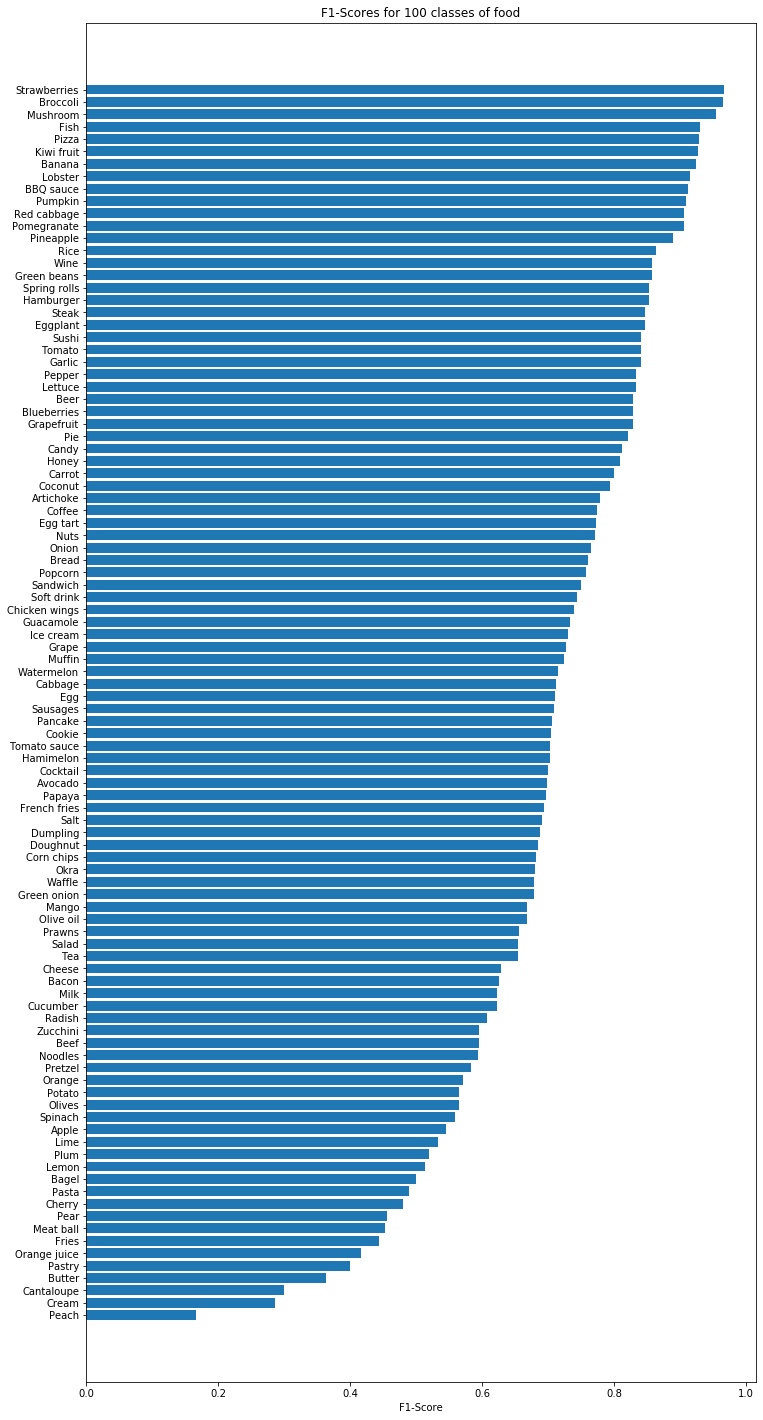

In [45]:
# Note: could possibly expand the size of the bars like here: https://stackoverflow.com/a/15214551/7900723 
fig, ax = plt.subplots(figsize=(12, 25))
ax.barh(range(len(f1_score_df)), f1_score_df.f1_score.values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_score_df["class"].values)
ax.set_xlabel("F1-Score")
ax.set_title(f"F1-Scores for {len(class_names)} classes of food")
ax.invert_yaxis();

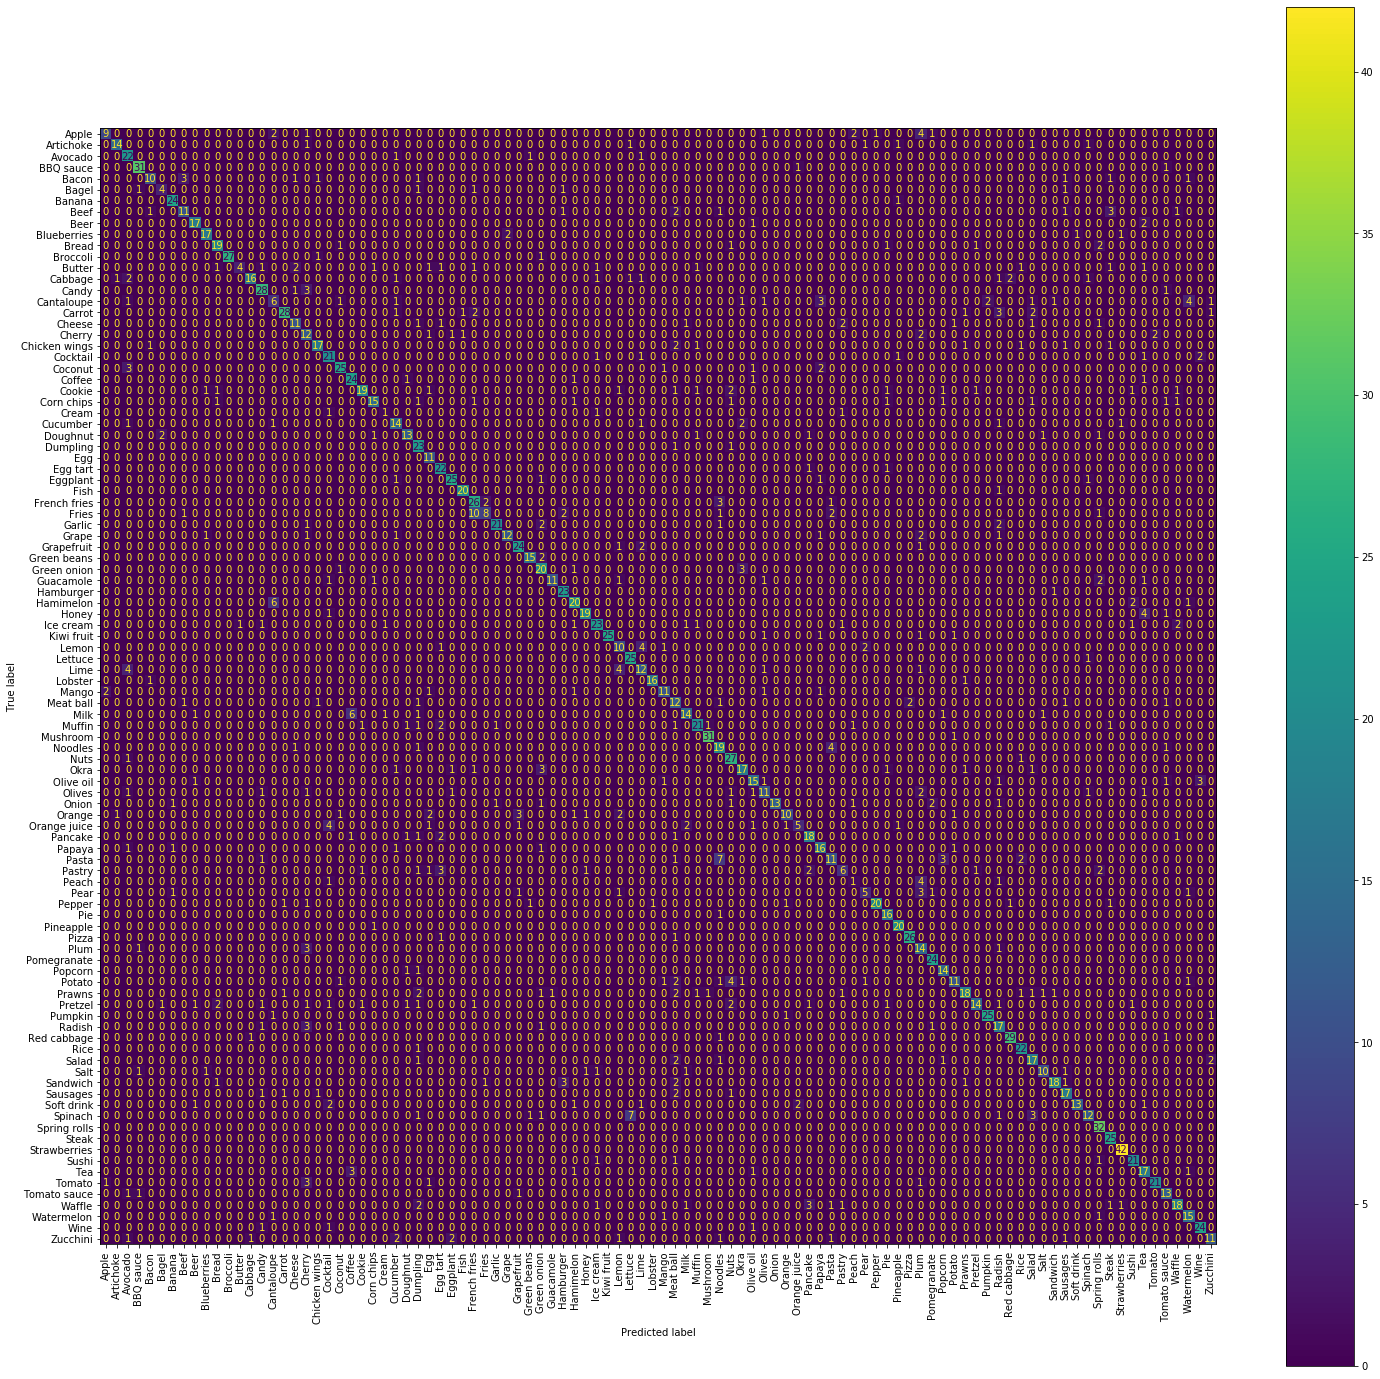

In [46]:
# Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# plt.figure(figsize=(25, 25))
fig, ax = plt.subplots(figsize=(25, 25))
ConfusionMatrixDisplay.from_predictions(y_true_class_name, y_pred_class_name, xticks_rotation="vertical", ax=ax)
# plt.show()